In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dates = pd.date_range("2024-01-01", periods=60, freq="B")
tickers = ["AAPL", "GOOG", "TSLA"]

data = {
    "date": np.repeat(dates, len(tickers)),
    "ticker": tickers * len(dates),
    "price": np.random.lognormal(mean=5, sigma=0.05, size=len(dates) * len(tickers)),
    "volume": np.random.randint(1e4, 1e5, size=len(dates) * len(tickers)),
}
df = pd.DataFrame(data)
df["price"] = df["price"].round(2)

print("Первые строки:")
print(df.head())
print("\nИнфо о датафрейме:")
print(df.info())
print("\nОписательная статистика по числовым колонкам:")
print(df.describe())

Первые строки:
        date ticker   price  volume
0 2024-01-01   AAPL  141.29   65891
1 2024-01-01   GOOG  156.02   31449
2 2024-01-01   TSLA  146.04   71955
3 2024-01-02   AAPL  135.94   71714
4 2024-01-02   GOOG  152.54   57663

Инфо о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    180 non-null    datetime64[ns]
 1   ticker  180 non-null    object        
 2   price   180 non-null    float64       
 3   volume  180 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 5.1+ KB
None

Описательная статистика по числовым колонкам:
                      date       price        volume
count                  180  180.000000    180.000000
mean   2024-02-10 12:00:00  148.117167  53099.461111
min    2024-01-01 00:00:00  128.250000  10078.000000
25%    2024-01-21 06:00:00  143.1075

In [29]:
df.query('(ticker == "TSLA" or ticker == "GOOG") and volume > 60000')
tsla_big = df.query('ticker == "TSLA" and volume > 80000')

In [4]:
# df = df.set_index("date").sort_index()

# tsla_big = df[(df["ticker"] == "TSLA") & (df["volume"] > 80000)]
# print(tsla_big.head())

print(df[["ticker", "price"]].head())

print(df.sort_values("price", ascending=False).head())


           ticker   price  volume
date                             
2024-01-11   TSLA  139.77   86676
2024-01-12   TSLA  141.29   83329
2024-01-19   TSLA  135.21   99342
2024-02-26   TSLA  143.64   87313
2024-03-06   TSLA  152.50   96919
           ticker   price
date                     
2024-01-01   AAPL  140.03
2024-01-01   GOOG  146.51
2024-01-01   TSLA  146.31
2024-01-02   AAPL  161.88
2024-01-02   GOOG  139.37
           ticker   price  volume
date                             
2024-01-15   AAPL  173.20   72403
2024-02-20   AAPL  169.76   77758
2024-01-12   GOOG  168.19   27059
2024-03-12   AAPL  166.59   43512
2024-01-04   TSLA  165.82   66461


In [36]:
# осуществляем агрегирование. средняя цена и объём по тикеру
group_ticker = df.groupby("ticker").agg(
    mean_price=("price", "mean"),
    max_price=("price", "max"),
    mean_volume=("volume", "mean"),
    sum_volume = ("volume", "sum"),
    mentions = ("ticker", "count")
)
print(group_ticker)

# ежедневный оборот (цена * объём) по тикеру
df["turnover"] = df["price"] * df["volume"]
daily_turnover = df.groupby(["date", "ticker"])["turnover"].sum().unstack("ticker")
print("\nЕжедневный оборот (первые строки):")
print(daily_turnover.head())


        mean_price  max_price   mean_volume  sum_volume  mentions
ticker                                                           
AAPL    147.674500     173.20  57924.933333     3475496        60
GOOG    148.400000     168.19  56338.200000     3380292        60
TSLA    147.381667     165.82  52128.833333     3127730        60

Ежедневный оборот (первые строки):
ticker             AAPL         GOOG         TSLA
date                                             
2024-01-01  10429994.52   6222279.70   8793231.00
2024-01-02   2985390.96   8109661.56   6348559.62
2024-01-03   6941245.64  13633574.40  10516989.67
2024-01-04   7767523.72   8149069.85  11020563.02
2024-01-05  11717452.45  12613731.24  11956670.00


In [ ]:
#работа с пропусками (искусственно создадим пропуски)

df_na = df.copy()
df_na.loc[df_na.sample(frac=0.05, random_state=0).index, "price"] = np.nan
print("\nКоличество пропусков по колонкам:")
print(df_na.isna().sum())

# Заполнение пропусков вперёд по каждому тикеру
df_na["price_filled"] = df_na.groupby("ticker")["price"].ffill()
print("\nПосле заполнения пропусков (price_filled):")
print(df_na[["ticker", "price", "price_filled"]].head(10))


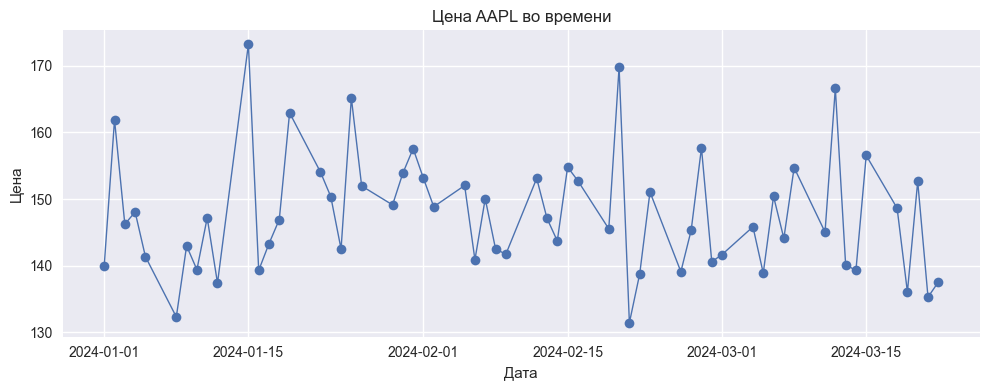

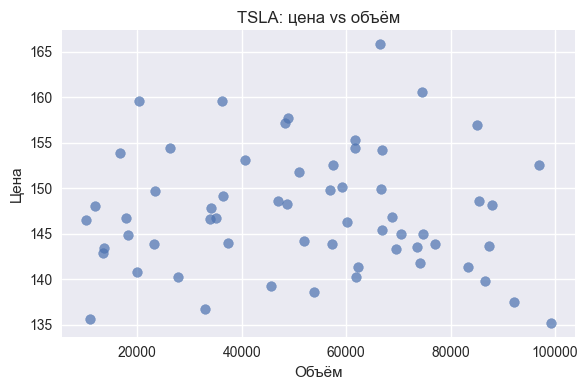

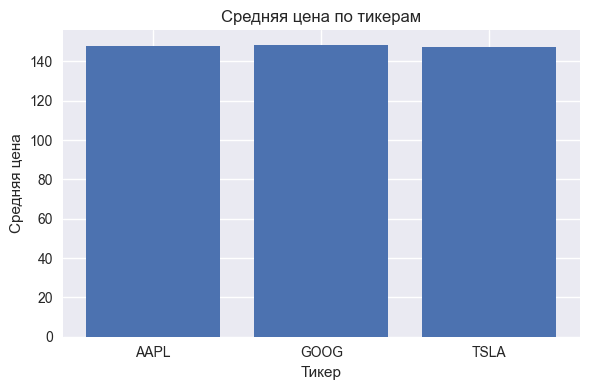

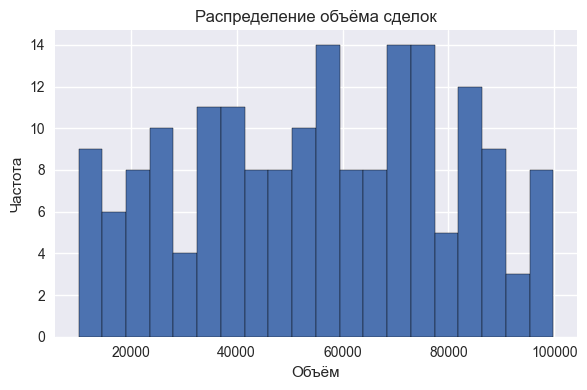

In [37]:

plt.style.use("seaborn-v0_8") 

#линейный график: цена AAPL во времени
aapl = df[df["ticker"] == "AAPL"]
plt.figure(figsize=(10, 4))
plt.plot(aapl.index, aapl["price"], marker="o", linewidth=1)
plt.title("Цена AAPL во времени")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()

#точечная диаграмма: зависимость цены от объёма для TSLA
tsla = df[df["ticker"] == "TSLA"]
plt.figure(figsize=(6, 4))
plt.scatter(tsla["volume"], tsla["price"], alpha=0.7)
plt.title("TSLA: цена vs объём")
plt.xlabel("Объём")
plt.ylabel("Цена")
plt.tight_layout()
plt.show()

#cтолбчатый график: средняя цена по тикерам
plt.figure(figsize=(6, 4))
plt.bar(group_ticker.index, group_ticker["mean_price"])
plt.title("Средняя цена по тикерам")
plt.xlabel("Тикер")
plt.ylabel("Средняя цена")
plt.tight_layout()
plt.show()

#гистограмма: распределение объёма
plt.figure(figsize=(6, 4))
plt.hist(df["volume"], bins=20, edgecolor="black")
plt.title("Распределение объёма сделок")
plt.xlabel("Объём")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


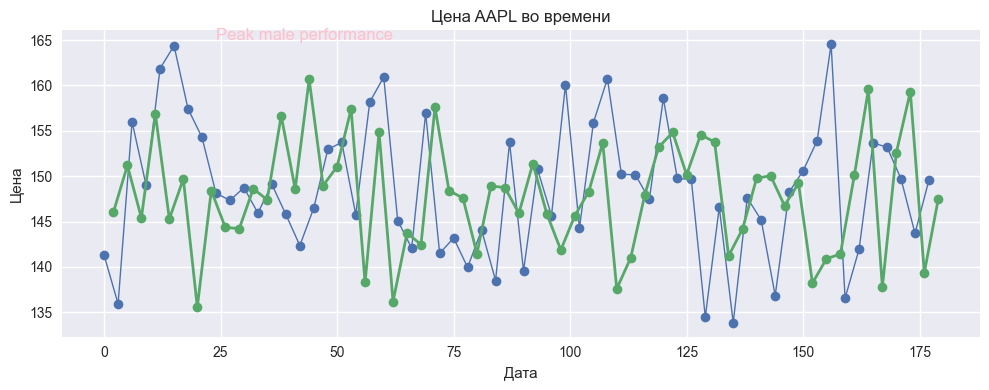

In [6]:
plt.style.use("seaborn-v0_8")

aapl = df[df["ticker"] == "AAPL"]
tsla = df[df["ticker"] == "TSLA"]

plt.figure(figsize = (10, 4))
plt.plot(aapl.index, aapl["price"], marker="o", linewidth=1)
plt.plot(tsla.index, tsla["price"], marker="o", linewidth=2)
plt.text(24, 165, 'Peak male performance', fontsize = 12, color = 'pink')
plt.title("Цена AAPL во времени")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# отфильтровать данные по большой восьмерке
# построить по США, Китаю и России один линейный крафик (Oil rents)
# отфильтровать топ-10 стран по natural gas rent + построить гистограмму
# репозиторий c данными or-sirina
